<b> Анализ сервиса аренды самокатов GoFast </b>

Проведем анализ данных о некоторых пользователях популярного сервиса аренды самокатов GoFast.Сначала подготовим данные, проверив их на дубликаты и пропуски. С помощью статистического анализа проверим некоторые гипотезы, которые могут помочь бизнесу вырасти:

- тратят ли пользователи с подпиской больше времени на поездки? 
- Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
- будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?



In [45]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

#### Шаг 1. Загрузка данных

In [46]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [47]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [48]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [49]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [50]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [51]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [52]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


По описанию данных видим, что дата хранится в формате object, надо преобразовать к более удобному виду. 
Столбцы названы корректно, в удобном написании и в соответсвии со значениями в них. 
Проверим данные на наличие пропусков и дубликатов на следующем шаге. 

#### Шаг 2. Предобработка данных

In [53]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d') 
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [54]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 K

In [55]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [56]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [57]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропусков в датафреймах не обнаружено, посмотрим, есть ли дубикаты. 

In [58]:
users[users.duplicated()]

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


In [59]:
users['user_id'].duplicated().sum()

31

31

In [60]:
users = users.drop_duplicates(subset=['user_id'], keep='first')
users['user_id'].duplicated().sum()

0

0

In [61]:
rides.duplicated().sum()

0

0

Дубликаты в исходных данных заменяем только в значении user_id из таблицы users, оставляя только первое вхождение идентификатора пользователя, так как чаще всего именно первая запись пользователя является оригиналом, а остальные могли возникнуть из-за технической ошибки, такой способ избавления от дубликатов наименее исказит дальнейший анализ. Остальные дубликаты связаны с характеристикой, которая может совпасть для разных пользователей. Пропусков в данных не обнаружено. 

#### Шаг 3. Исследовательский анализ данных

<AxesSubplot:title={'center':'частота встречаемости городов'}>

<AxesSubplot:title={'center':'частота встречаемости городов'}>

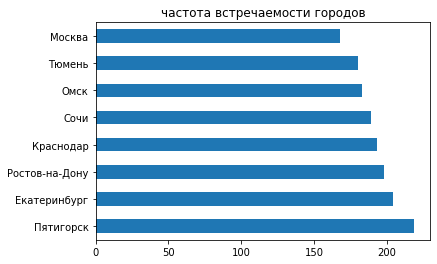

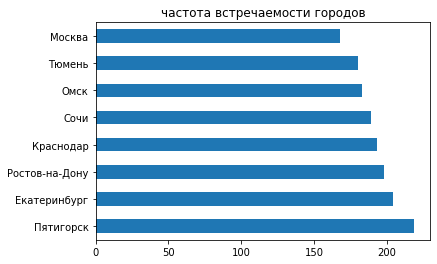

In [62]:
users['city'].value_counts(ascending=False).plot(kind='barh', title='частота встречаемости городов')

<AxesSubplot:title={'center':'соотношение пользователей с подпиской и без подписки'}, ylabel='subscription_type'>

<AxesSubplot:title={'center':'соотношение пользователей с подпиской и без подписки'}, ylabel='subscription_type'>

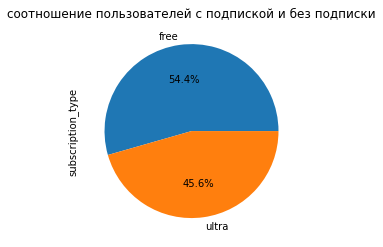

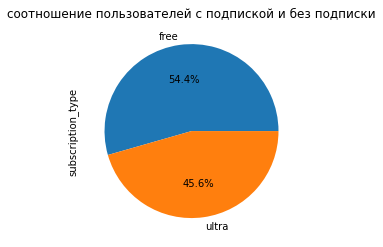

In [63]:
users['subscription_type'].value_counts().plot(kind='pie', title='соотношение пользователей с подпиской и без подписки', autopct='%1.1f%%')

Text(0, 0.5, 'Количество пользователей')

Text(0, 0.5, 'Количество пользователей')

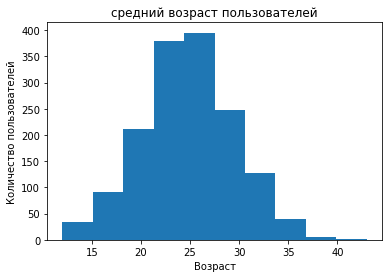

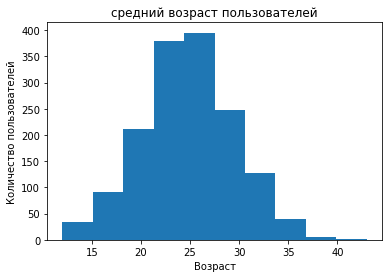

In [64]:
users['age'].plot(kind='hist', title='средний возраст пользователей')
plt.xlabel('Возраст') 
plt.ylabel('Количество пользователей')

Text(0, 0.5, 'количество пользователей')

Text(0, 0.5, 'количество пользователей')

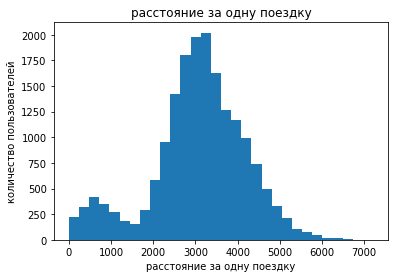

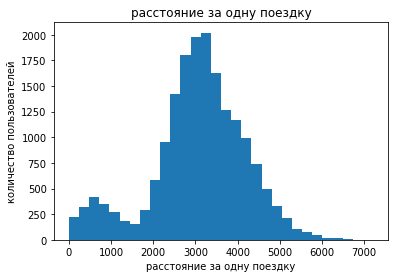

In [65]:
rides['distance'].plot(kind='hist', bins=30, title='расстояние за одну поездку')
plt.xlabel('расстояние за одну поездку') 
plt.ylabel('количество пользователей')

Text(0, 0.5, 'количество поездок')

Text(0, 0.5, 'количество поездок')

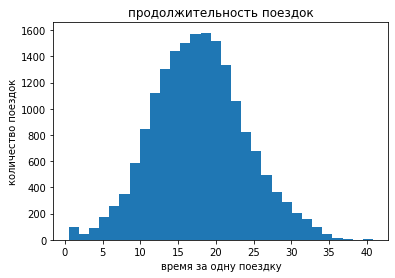

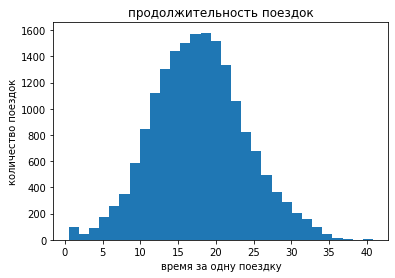

In [66]:
rides['duration'].plot(kind='hist', bins=30, title='продолжительность поездок')
plt.xlabel('время за одну поездку') 
plt.ylabel('количество поездок')

Чаще всего самокаты используются в Пятигорске. Процент пользователей с подпиской и без нее сильно не отличается, но больше людей без нее. Наибольшем спросом услуги по аренде самоката пользуюся у молодежи (21-25 лет). Распределение продолжительности поездок близко к нормальному с медианой в 15-20 минут. Чаще всего пользователи проезжают 3000-4000 метров за одну поездку 

#### Шаг 4. Объединение данных

In [67]:
combined = users.merge(rides, on='user_id', how='left')
combined = combined.merge(subscriptions, on='subscription_type', how='left')
combined.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [68]:
len(combined)

18068

18068

In [69]:
len(rides)

18068

18068

Количество строк в изначальной таблице с поездками и объединенной совпадают, значит соединили корректно. 

In [70]:
user_ultra = combined.query('subscription_type=="ultra"')
user_ultra.head(15)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [71]:
user_free = combined.query('subscription_type=="free"')
user_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


Text(0, 0.5, 'количество поездок')

Text(0, 0.5, 'количество поездок')

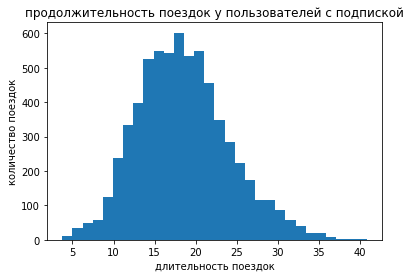

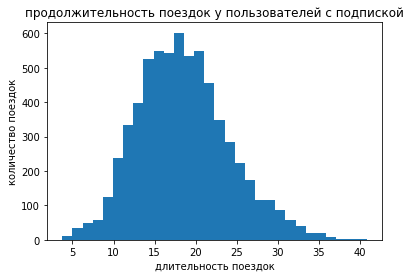

In [72]:
user_ultra['duration'].plot(kind='hist', bins=30, title='продолжительность поездок у пользователей с подпиской')
plt.xlabel('длительность поездок') 
plt.ylabel('количество поездок')

Text(0, 0.5, 'количество поездок')

Text(0, 0.5, 'количество поездок')

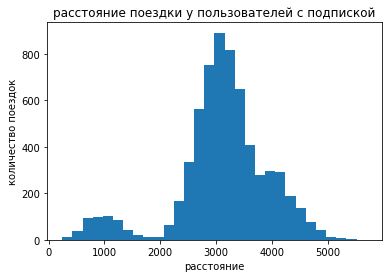

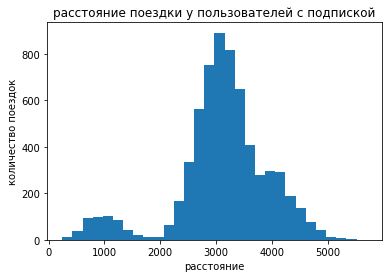

In [73]:
user_ultra['distance'].plot(kind='hist', bins=30, title='расстояние поездки у пользователей с подпиской')
plt.xlabel('расстояние') 
plt.ylabel('количество поездок')

Text(0, 0.5, 'количество поездок')

Text(0, 0.5, 'количество поездок')

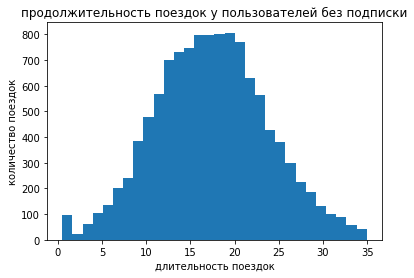

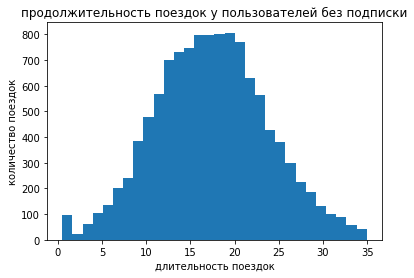

In [74]:
user_free['duration'].plot(kind='hist', bins=30, title='продолжительность поездок у пользователей без подписки')
plt.xlabel('длительность поездок') 
plt.ylabel('количество поездок')

Text(0, 0.5, 'количество поездок')

Text(0, 0.5, 'количество поездок')

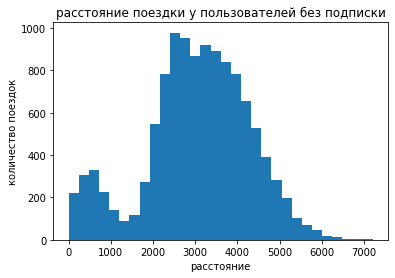

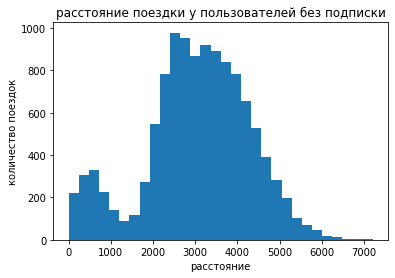

In [75]:
user_free['distance'].plot(kind='hist', bins=30, title='расстояние поездки у пользователей без подписки')
plt.xlabel('расстояние') 
plt.ylabel('количество поездок')

В среднем длительность и расстояние поездки у пользователей с подпиской и без нее сильно не различается. Максимальная длительность поездки относится к людям с подпиской, а максимальное расстояние к пользователем без нее. 

#### Шаг 5. Подсчёт выручки

In [76]:
combined['duration'] = np.ceil(combined['duration']) #округляем время поездки до агрегирования
combined.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


In [77]:
agr_data = combined.groupby(['user_id', 'month']).agg({
    'distance': 'sum',           
    'duration': 'sum',      
    'date': 'count'           
}).rename(columns={'date': 'ride_count'}).reset_index()
agr_data.head()

,user_id,month,distance,duration,ride_count
0,1,1,7027.511294,42.0,2
1,1,4,754.159807,7.0,1
2,1,8,6723.470560,46.0,2
3,1,10,5809.911100,32.0,2
4,1,11,7003.499363,56.0,3


,user_id,month,distance,duration,ride_count
0,1,1,7027.511294,42.0,2
1,1,4,754.159807,7.0,1
2,1,8,6723.470560,46.0,2
3,1,10,5809.911100,32.0,2
4,1,11,7003.499363,56.0,3


In [78]:
agr_data = agr_data.merge(users[['user_id', 'subscription_type']], on='user_id', how='left')
agr_data.head()

,user_id,month,distance,duration,ride_count,subscription_type
0,1,1,7027.511294,42.0,2,ultra
1,1,4,754.159807,7.0,1,ultra
2,1,8,6723.470560,46.0,2,ultra
3,1,10,5809.911100,32.0,2,ultra
4,1,11,7003.499363,56.0,3,ultra


,user_id,month,distance,duration,ride_count,subscription_type
0,1,1,7027.511294,42.0,2,ultra
1,1,4,754.159807,7.0,1,ultra
2,1,8,6723.470560,46.0,2,ultra
3,1,10,5809.911100,32.0,2,ultra
4,1,11,7003.499363,56.0,3,ultra


In [79]:
agr_data = agr_data.merge(subscriptions, on='subscription_type', how='left')
agr_data.head()

,user_id,month,distance,duration,ride_count,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7027.511294,42.0,2,ultra,6,0,199
1,1,4,754.159807,7.0,1,ultra,6,0,199
2,1,8,6723.470560,46.0,2,ultra,6,0,199
3,1,10,5809.911100,32.0,2,ultra,6,0,199
4,1,11,7003.499363,56.0,3,ultra,6,0,199


,user_id,month,distance,duration,ride_count,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7027.511294,42.0,2,ultra,6,0,199
1,1,4,754.159807,7.0,1,ultra,6,0,199
2,1,8,6723.470560,46.0,2,ultra,6,0,199
3,1,10,5809.911100,32.0,2,ultra,6,0,199
4,1,11,7003.499363,56.0,3,ultra,6,0,199


In [80]:
agr_data['profit'] = agr_data['ride_count']*agr_data['start_ride_price'] + agr_data['minute_price']*agr_data['duration']+agr_data['subscription_fee']
agr_data.head(15)

,user_id,month,distance,duration,ride_count,subscription_type,minute_price,start_ride_price,subscription_fee,profit
0,1,1,7027.511294,42.0,2,ultra,6,0,199,451.0
1,1,4,754.159807,7.0,1,ultra,6,0,199,241.0
2,1,8,6723.470560,46.0,2,ultra,6,0,199,475.0
3,1,10,5809.911100,32.0,2,ultra,6,0,199,391.0
4,1,11,7003.499363,56.0,3,ultra,6,0,199,535.0
5,1,12,6751.629942,28.0,2,ultra,6,0,199,367.0
6,2,3,10187.723006,63.0,3,ultra,6,0,199,577.0
7,2,4,6164.381824,40.0,2,ultra,6,0,199,439.0
8,2,6,3255.338202,14.0,1,ultra,6,0,199,283.0
9,2,7,6780.722964,48.0,2,ultra,6,0,199,487.0


,user_id,month,distance,duration,ride_count,subscription_type,minute_price,start_ride_price,subscription_fee,profit
0,1,1,7027.511294,42.0,2,ultra,6,0,199,451.0
1,1,4,754.159807,7.0,1,ultra,6,0,199,241.0
2,1,8,6723.470560,46.0,2,ultra,6,0,199,475.0
3,1,10,5809.911100,32.0,2,ultra,6,0,199,391.0
4,1,11,7003.499363,56.0,3,ultra,6,0,199,535.0
5,1,12,6751.629942,28.0,2,ultra,6,0,199,367.0
6,2,3,10187.723006,63.0,3,ultra,6,0,199,577.0
7,2,4,6164.381824,40.0,2,ultra,6,0,199,439.0
8,2,6,3255.338202,14.0,1,ultra,6,0,199,283.0
9,2,7,6780.722964,48.0,2,ultra,6,0,199,487.0


In [81]:
agr_data = agr_data.drop(columns=['minute_price', 'start_ride_price', 'subscription_fee'])
agr_data.head()

,user_id,month,distance,duration,ride_count,subscription_type,profit
0,1,1,7027.511294,42.0,2,ultra,451.0
1,1,4,754.159807,7.0,1,ultra,241.0
2,1,8,6723.470560,46.0,2,ultra,475.0
3,1,10,5809.911100,32.0,2,ultra,391.0
4,1,11,7003.499363,56.0,3,ultra,535.0


,user_id,month,distance,duration,ride_count,subscription_type,profit
0,1,1,7027.511294,42.0,2,ultra,451.0
1,1,4,754.159807,7.0,1,ultra,241.0
2,1,8,6723.470560,46.0,2,ultra,475.0
3,1,10,5809.911100,32.0,2,ultra,391.0
4,1,11,7003.499363,56.0,3,ultra,535.0


#### Шаг 6. Проверка гипотез

Чтобы понять тратят ли пользователи с подпиской больше времени на поездки, сформулируем нулевую и альтернативные гипотезы соответсвенно:
- пользователи с подпиской тратят столько же времени на поездки 
- пользователи с подпиской тратят больше времени на поездки.

In [82]:
ultra = user_ultra['duration']
free = user_free['duration']
results = st.ttest_ind(ultra, free)
results.pvalue

2.5608196633291235e-34

2.5608196633291235e-34

p-значение слишком маленькое, отвергаем нулевую гипотезу и оставляем альтернативную. 
Значит, наличие подписки влияет на длительность поездки и пользователи с подпиской тратят на них больше времени. 

Проверим нулевую гипотезу: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. Альтернативная ей будет гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.

In [83]:
value = 3130
free = user_ultra['distance']
results = st.ttest_1samp(free, value, alternative='less')
results.pvalue 

0.08046311521502146

0.08046311521502146

p-значение больше 0.05, не отвергаем нулевую гипотезу о том, что  среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130. 

Чтобы понять будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки, сформулируем нулевую и альтернативные гипотезы соответсвенно:

- помесячная выручка от пользователей с подпиской по месяцам такая же, как и выручка от пользователей без подписки
- помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

In [84]:
profit_ultra = agr_data.query('subscription_type=="ultra"')['profit']
profit_free = agr_data.query('subscription_type=="free"')['profit']
results = st.ttest_ind(profit_ultra, profit_free)
results.pvalue

3.7700788769430433e-31

3.7700788769430433e-31

p-значение слишком маленькое, отвергаем нулевую гипотезу. Значит, выручка от пользователей с подпиской и бнз отличается, и мы делаем вывод, что выручка от пользователей с подпиской выше. 

Для проверки гипотезы снизилось ли количество обращений в техподдержку после обновления сервера, с которыми взаимодействует мобильное приложение понадобился бы двухвыборочный t-тест для зависимых выборок, поскольку мы бы проверяли изменение истинного среднего одной и той же генеральной совокупности. 
Для этого нужно использовать метод scipy.stats.ttest_rel из бибилиотеки scipy.stats, передав ему alternative='greater'. 

#### Шаг 7. Распределения

In [85]:
p = 0.1
clients = 100
prob = 0.05
n=1
while st.binom.cdf(clients, n, p)>prob:
    n+=1
n

1172

1172

Значит, чтобы вероятность не выполнить план была примерно 5% нужно разослать минимум 1172 промокода. Построим график для биномиального распределения, чтобы наглядно увидеть, что это действительно так. 

<AxesSubplot:>

<AxesSubplot:>

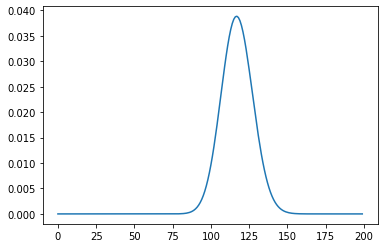

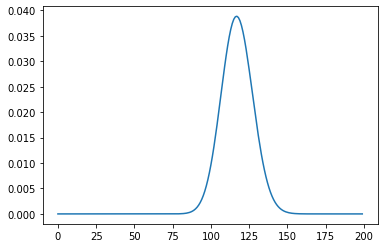

In [86]:
n = 1172
p = 0.1
k = np.arange(0, 200)

prob=st.binom.pmf(k,n,p)
distr = pd.Series(prob, index=k)
    
distr.plot(kind='line')

In [87]:
p = 0.4
n = 1000000

mu = n*p
sigma =(n * p * (1 - p))**0.5

distr = st.norm(mu,sigma)
distr.cdf(399500)


0.15371708296369768

0.15371708296369768

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей равна 0.15371708296369768. 

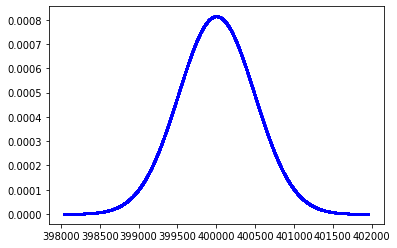

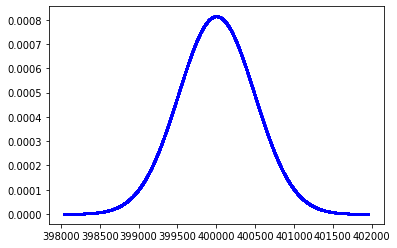

In [88]:
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
 
n = 1000000
p = 0.4

left = int(n * p - 4 * (n * p * (1 - p))**0.5)
right = int(n * p + 4 * (n * p * (1 - p))**0.5)
 
x = list(range(max(0, left), right))
ax = plt.subplot()
ax.plot(x, st.binom.pmf(x, n, p), 'bo', ms=2)

<b>Итоговый вывод</b>

В ходе работы были проанализированы данные пользователей опулярного сервиса аренды самокатов GoFast. Пропуски в данных отсутсвовали, были обработаны дубликаты в значении user_id, так как это уникальный идентификатор. 

Проверяя данные среди всех пользователей, оказалось, что:
- больше всего самокаты используются в Пятигорске;
- процент пользователей с подпиской и без нее сильно не отличается(54.4%- без нее и 46.6%-используют подписку);
- наибольшим спросом услуги по аренде самоката пользуюся у молодежи (21-25 лет);
- среднее время аренды находится в интервале 15-20 минут;
- чаще всего пользователи проезжают 3000-4000 метров за одну поездку.

Далее пользователи были разделены на тех, что используют подписку, и тех, что ездят без нее. На основе этого мы выяснили:

- длительность и расстояние поездки у пользователей с подпиской и без нее сильно не различается
- пользователи с подпиской тратят больше времени на поездки 
- среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130
- помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

В итоге мы можем сказать, что пользователи с подпиской являются более выгодными для компании, поскольку они приносят выручки больше, чем пользователи без нее. 

Чтобы избежать дубликатов в значении user_id в будущем стоит ограничить возможность регистрироваться под одинаковым идентификатором, если таковая возможность имеется и она стала причиной появления повторных значений. 
